# Report generation tool

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
import joblib

from audit_tool.reporting import generate_explainability_report, generate_robustness_report

X_train = pd.read_csv('../data/processed/prosperloan/X_train_lasso.csv')
y_train = pd.read_csv('../data/processed/prosperloan/y_train_lasso.csv').squeeze()
X_test  = pd.read_csv('../data/processed/prosperloan/X_test_lasso.csv')
y_test  = pd.read_csv('../data/processed/prosperloan/y_test_lasso.csv').squeeze()

/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/art/estimators/certification/__init__.py:30: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


## Explainability Report

Generando informe para xgboost…
[WARNING] PDP failed for 'Term': 'super' object has no attribute '__sklearn_tags__'
Report saved to /home/celia/Desktop/tfm-credit-risk-audit/outputs/reports/explainability/xgboost_explainability_report.html
Generando informe para logistic_regression…
[INFO] PDP generated for 'Term'


/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Report saved to /home/celia/Desktop/tfm-credit-risk-audit/outputs/reports/explainability/logistic_regression_explainability_report.html
Generando informe para random_forest…
[INFO] PDP generated for 'TotalInquiries'


/home/celia/Desktop/tfm-credit-risk-audit/audit_tool/reporting.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Report saved to /home/celia/Desktop/tfm-credit-risk-audit/outputs/reports/explainability/random_forest_explainability_report.html
Reports were correctly generated!


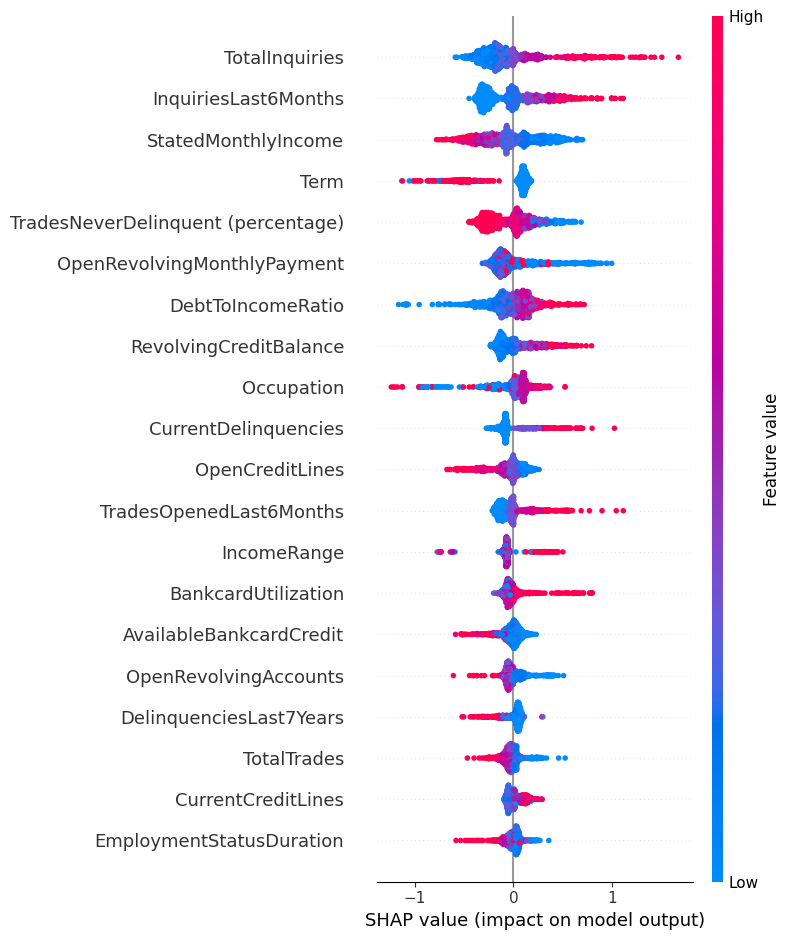

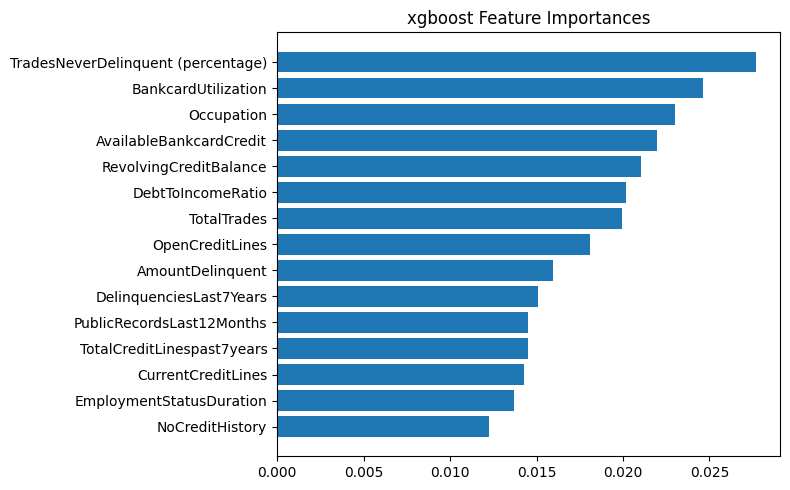

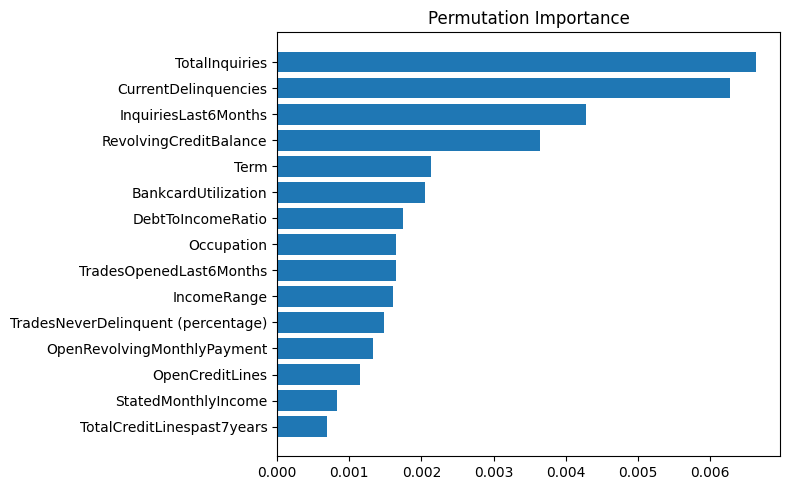

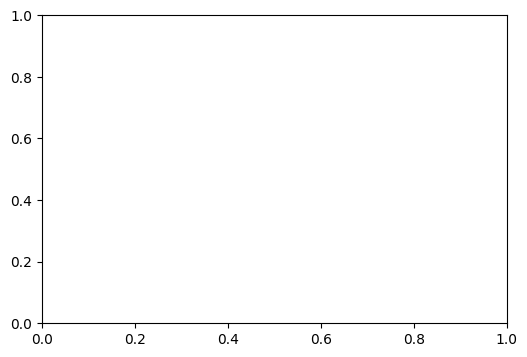

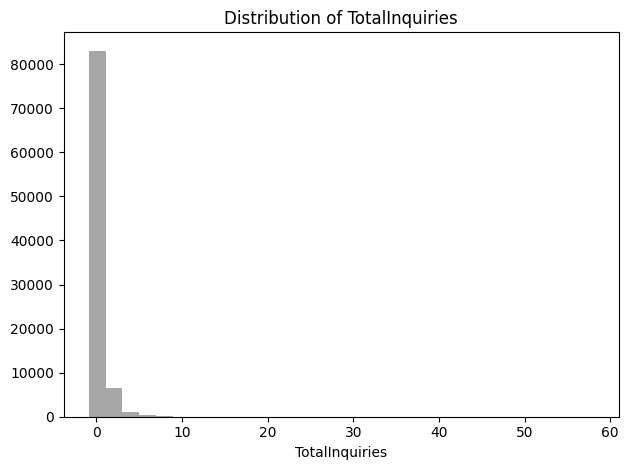

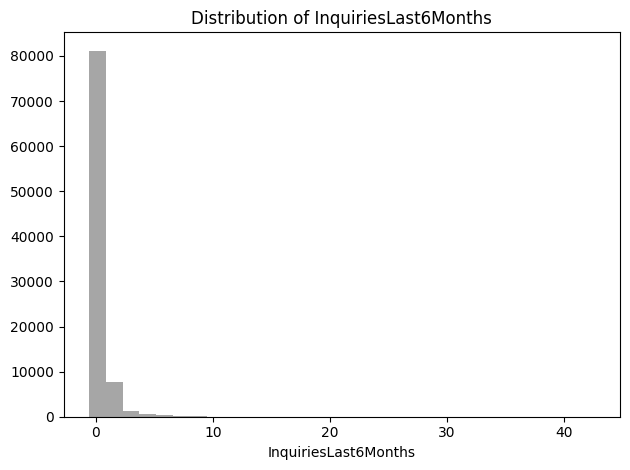

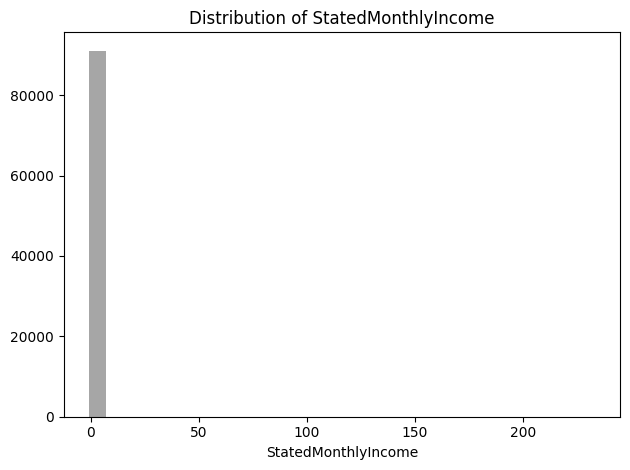

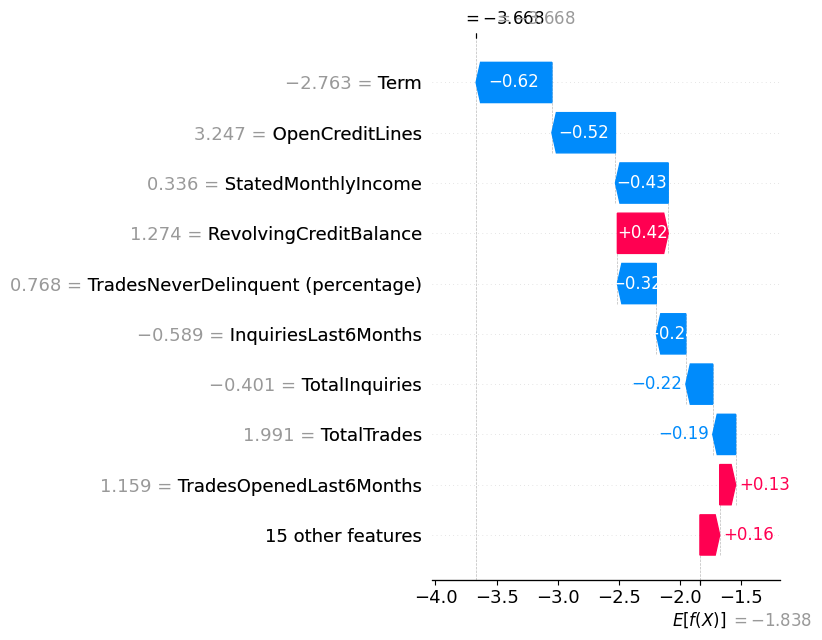

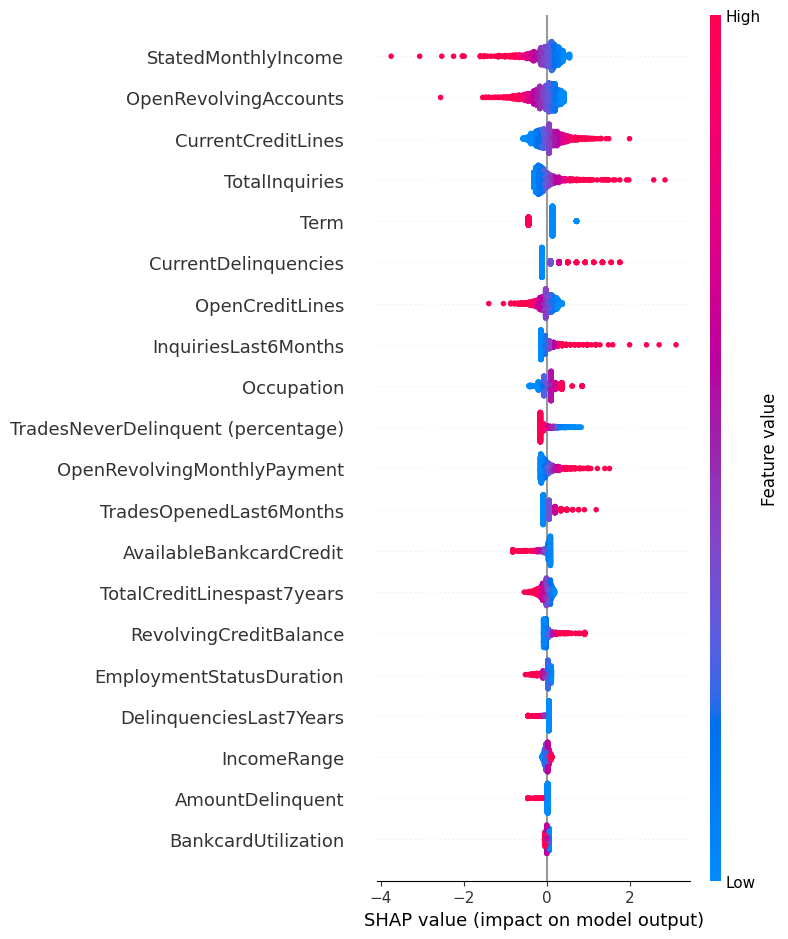

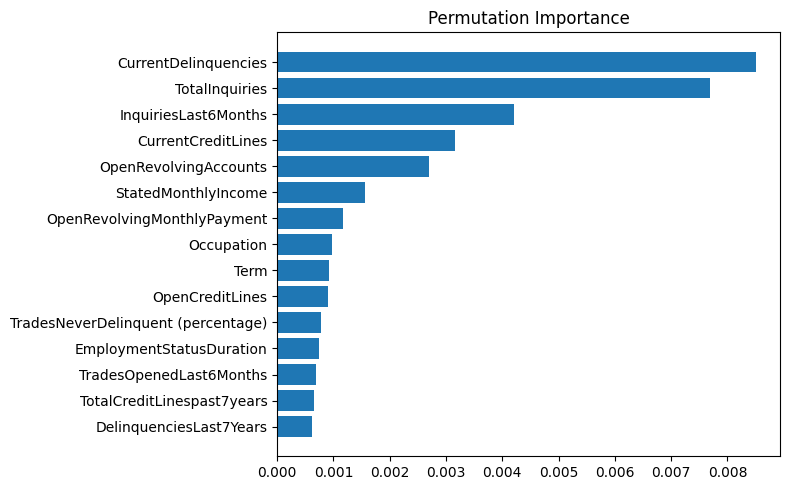

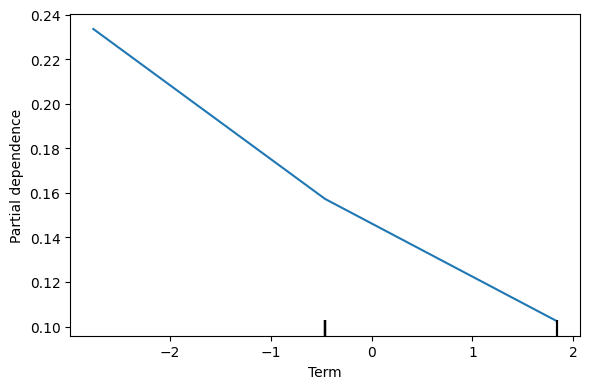

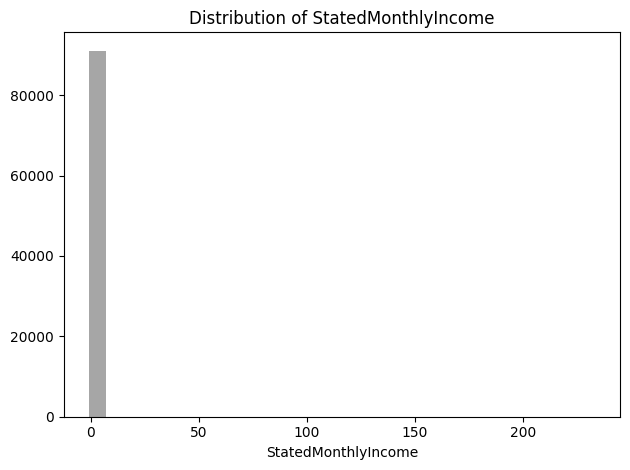

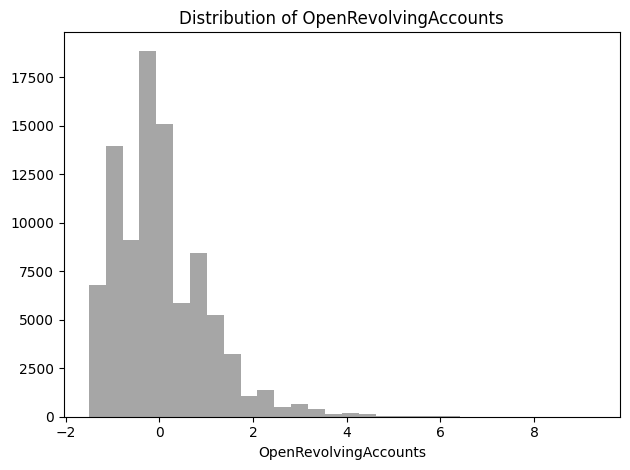

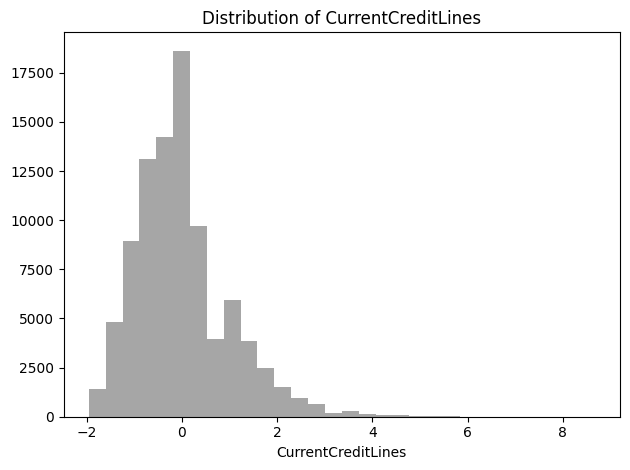

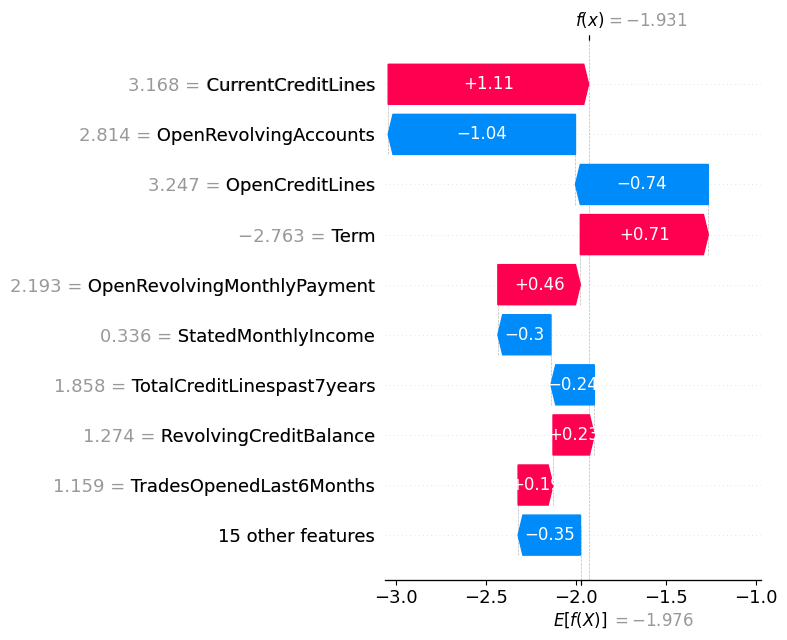

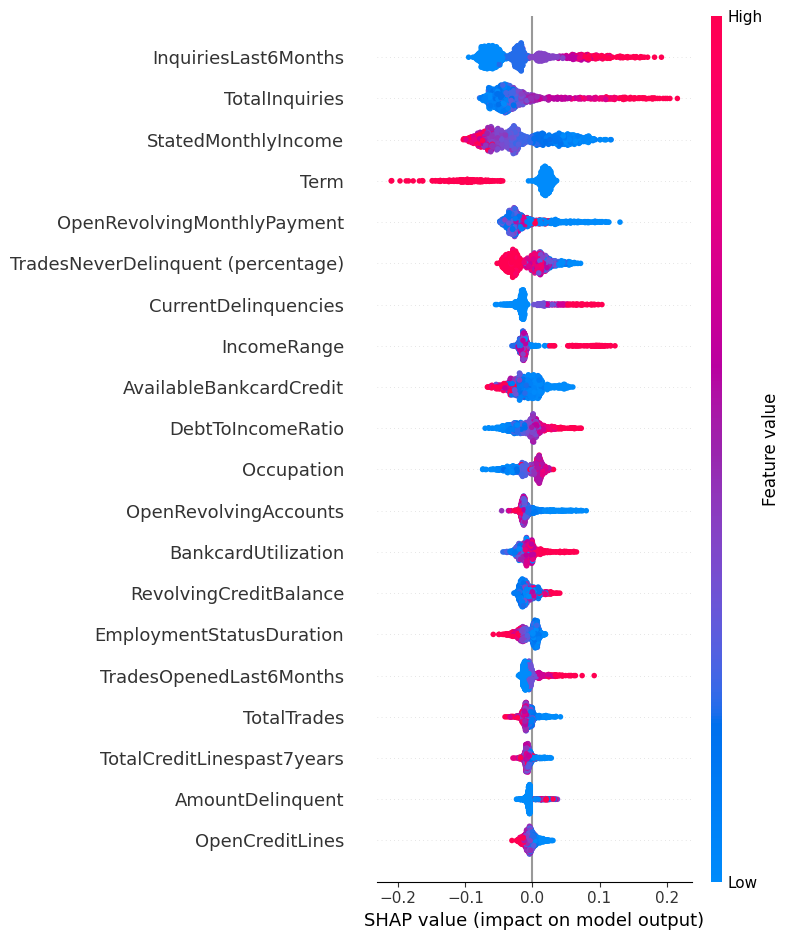

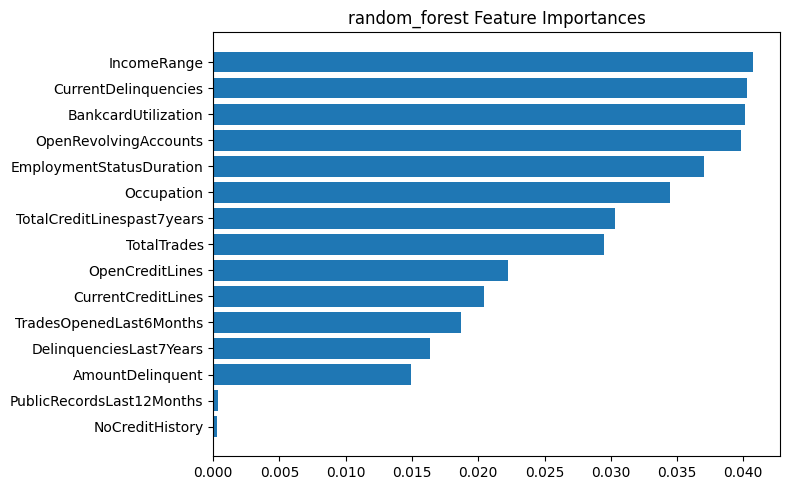

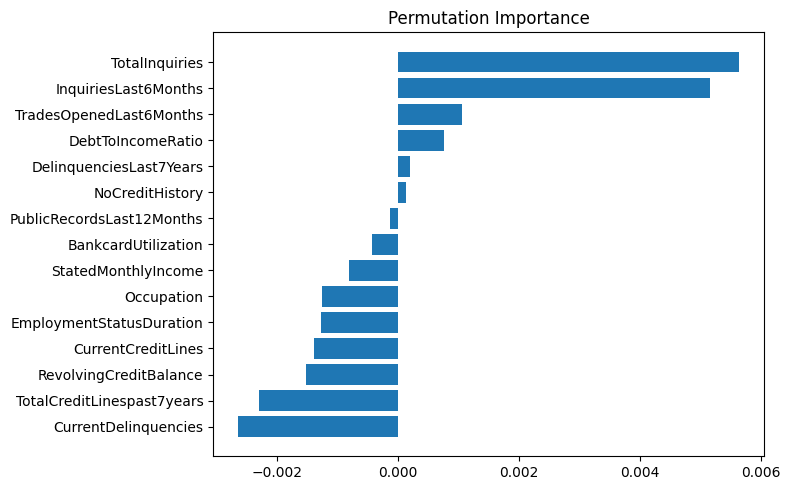

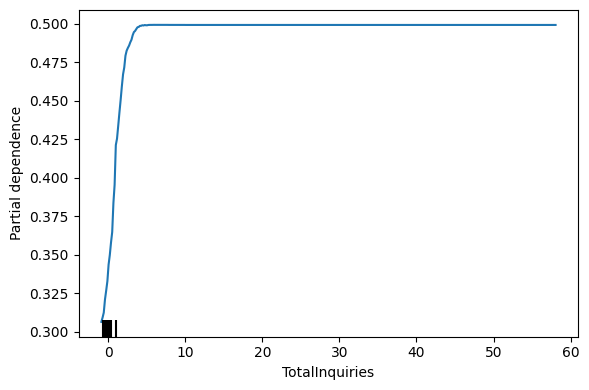

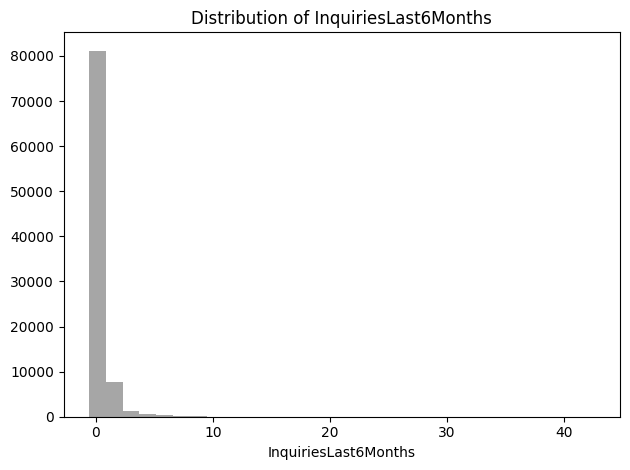

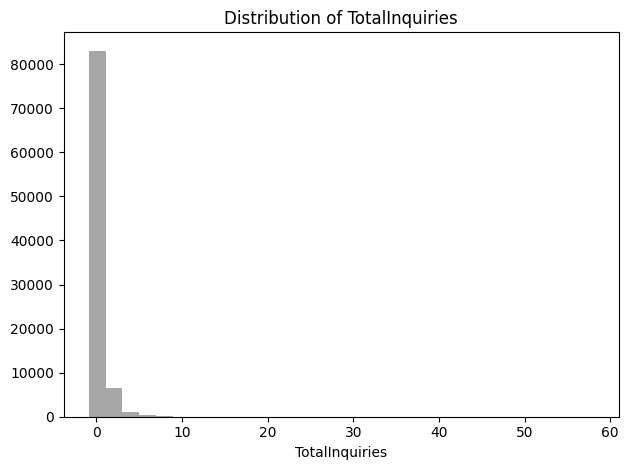

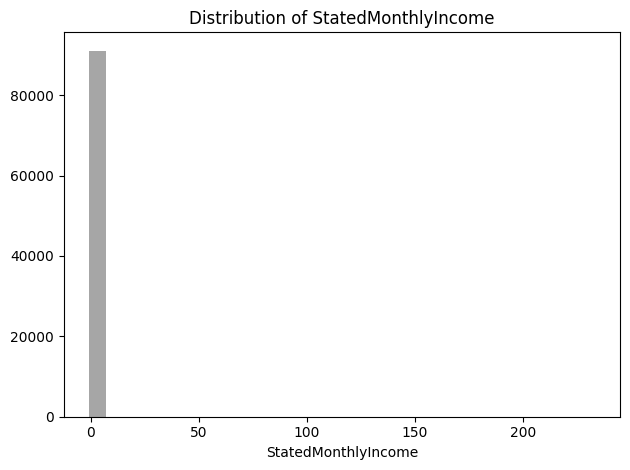

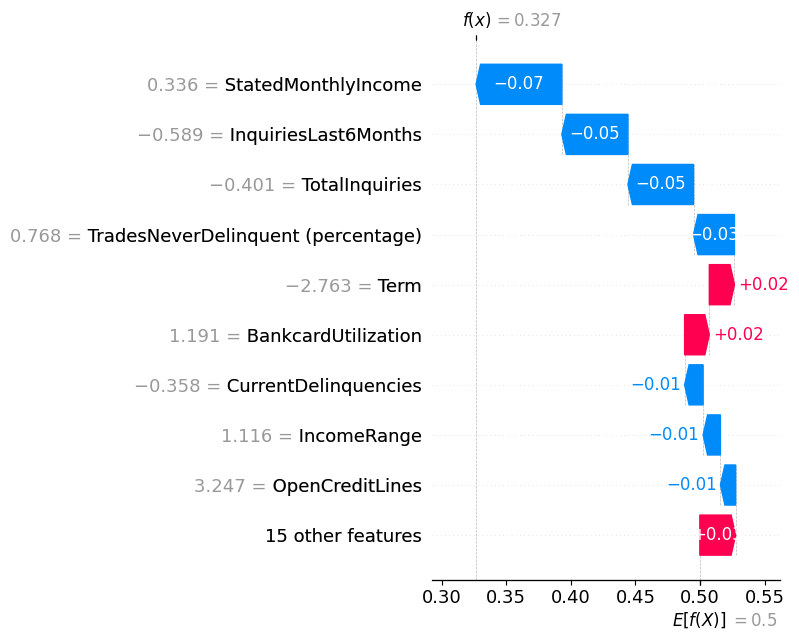

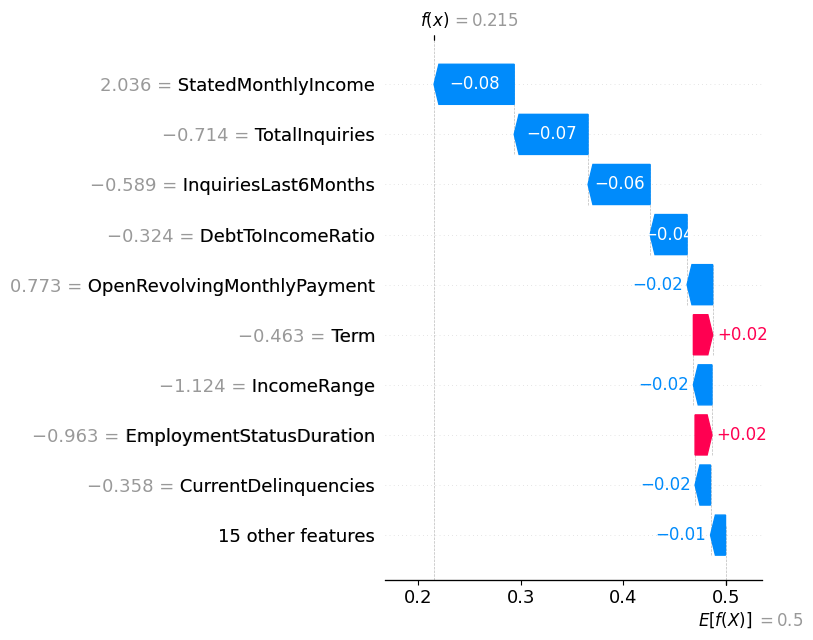

In [1]:
models = {
    'xgboost'            : joblib.load('../models/prosperloan/xgboost.pkl'),
    'logistic_regression': joblib.load('../models/prosperloan/logisticregression.pkl'),
    'random_forest'      : joblib.load('../models/prosperloan/randomforest.pkl'),
}

for name, mdl in models.items():
    print(f"Generando informe para {name}…")
    generate_explainability_report(
        model_name=name,
        model=mdl,
        X_train=X_train,
        X_test =X_test,
        y_test =y_test,
        instance_indices=[0, 10] 
    )
print("Reports were correctly generated!")


## Robustness Report

In [ ]:
    'xgboost': {
        'path': '../models/prosperloan/xgboost.pkl',
        'type': 'xgb'
    },
    'logistic_regression': {
        'path': '../models/prosperloan/logisticregression.pkl',
        'type': 'logreg'
    },

In [3]:
# Diccionario de modelos con sus rutas y tipo para ART
robust_models = {
    'random_forest': {
        'path': '../models/prosperloan/randomforest.pkl',
        'type': 'rf'
    },
}

# Obtener nombres de variables
feature_names = X_test.columns.tolist()

# Generar informe de robustez para cada modelo
for name, info in robust_models.items():
    print(f"Generating robustness report for {name}…")
    generate_robustness_report(
        model_name=name,
        model_path=info['path'],
        model_type=info['type'],
        X=X_test.values,
        y=y_test.values,
        feature_names=feature_names
    )

print("Robustness reports were correctly generated!")

Generating robustness report for random_forest…


/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set

Robustness report saved to /home/celia/Desktop/tfm-credit-risk-audit/outputs/reports/robustness/random_forest_robustness_report.html
Robustness reports were correctly generated!
